# Ausilon Viana de Souza - 980 - TP555

In [ ]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import random
import pandas as pd
from google.colab import files
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
import pandas as pd
import timeit
import os

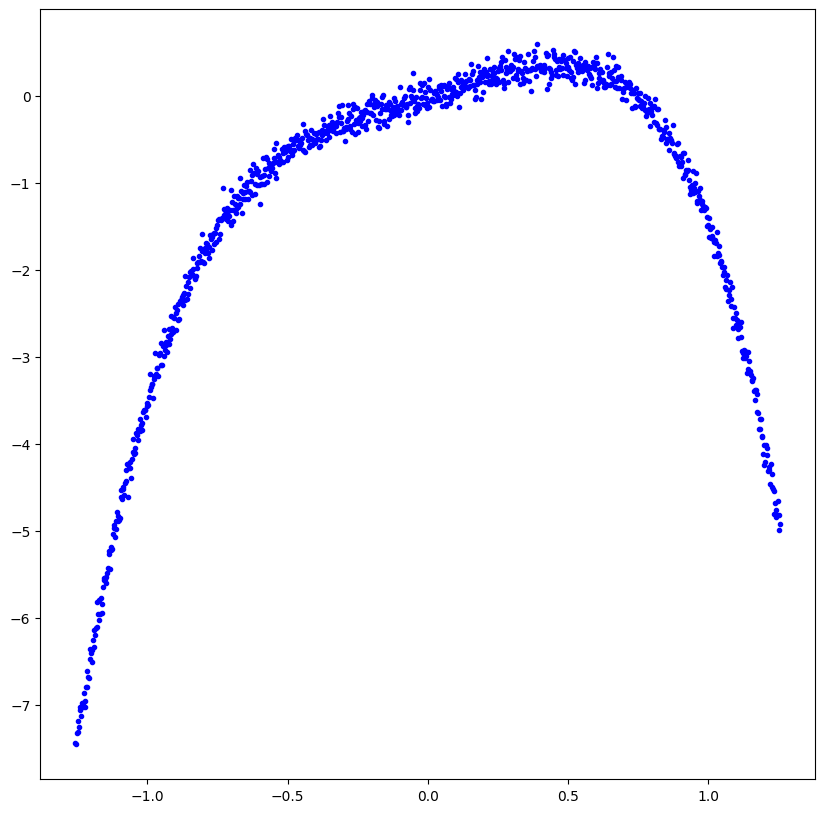

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/luiz10ml/tp555-ml/refs/heads/main/misc/nonLinearRegData.csv'
df = pd. read_csv ( url, header = None )
x = df [0]. to_numpy ()
y = df [1]. to_numpy ()
x = x. reshape (len(x) ,1)
y = y. reshape (len(y) ,1)

fig = plt.figure(figsize=(10,10))
plt.plot(x, y, "b.")

In [ ]:
# Split the whole dataset into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=7)

# Print size of the datasets.
print('Tamanho do conjunto de treinamento:', len(y_train))
print('Tamanho do conjunto de validação:', len(y_val))

Tamanho do conjunto de treinamento: 800
Tamanho do conjunto de validação: 200


In [ ]:
def calculateClosedFormSolution(X, y):
    """Calculate closed-form solution using the normal equation."""
    # Number of examples.
    N = len(y)
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/N)*np.sum(np.power((y - yhat), 2))

    return Joptimum, a_opt

def calculateErrorSurface(X, y):
    """Generate data points for plotting the error surface."""
    # Number of examples.
    N = len(y)
    # Generate values for parameter space.
    M = 1000
    a0 = np.linspace(-10.0, 14.0, M)
    a1 = np.linspace(-10.0, 14.0, M)

    A0, A1 = np.meshgrid(a0, a1)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A0[iter1, iter2] + A1[iter1, iter2]*X # Aqui muda se mudar a função objetivo.
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))

    return J, A0, A1

def calculateErrorSurface_1(x1,x2, y):
    """Generate data points for plotting the error surface."""
    # Number of examples.
    N = len(y)
    # Generate values for parameter space.
    M = 1000
    a1 = np.linspace(-10.0, 14.0, M)
    a2 = np.linspace(-10.0, 14.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2 # Aqui muda se mudar a função objetivo.
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))

    return J, A1, A2

def calculateErrorSurface_2(x1, x2, y):
    """Generate data points for plotting the error surface."""
    # Number of examples.
    N = len(y)
    # Generate values for parameter space.
    M = 1000
    a1 = np.linspace(-10.0, 14.0, M)
    a2 = np.linspace(-10.0, 14.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2 # Aqui muda se mudar a função objetivo.
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))

    return J, A1, A2

A. Encontre os valores ótimos dos pesos através do método de forma fechada, i.e., equação
normal, ou também conhecida como método dos mínimos quadrados.

(a)$h = a_1x^3 + a_2x^5$

(b)$h = a_1x + a_2x^4$

In [ ]:
def batch_gradient_descent(X, y, learning_rate, n_iterations):
    """
    Implementa o algoritmo de gradiente descendente em batelada.

    Parâmetros:
        X (np.ndarray): Matriz de entrada com as features.
        y (np.ndarray): Vetor de saída.
        learning_rate (float): Taxa de aprendizado.
        n_iterations (int): Número máximo de épocas.

    Retorna:
        theta (np.ndarray): Coeficientes do modelo.
        cost_history (list): Histórico da função de custo em cada iteração.
    """
    m = len(y)  # Número de exemplos de treinamento
    theta = np.random.randn(X.shape[1], 1)  # Inicializa os pesos aleatoriamente
    cost_history = []

    for i in range(n_iterations):
        y_predict = X.dot(theta)
        residuals = y_predict - y
        gradients = 2/m * X.T.dot(residuals)
        theta = theta - learning_rate * gradients
        cost = np.mean(residuals**2)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
def equacaoNormal(x, y, grau):
    """
    Ajusta um modelo de regressão polinomial aos dados (x, y) para o grau especificado.

    Parâmetros:
        x (array-like): Vetor de entrada (1D) - já carregado acima
        y (array-like): Vetor de saída (1D) - já carregado acima
        grau (int): Grau do polinômio a ser ajustado

    Retorna:
        theta (np.ndarray): Coeficientes do polinômio ajustado
    """

    # Monta a matriz X com as potências de x até o grau desejado
    X = np.column_stack([x**i for i in range(grau + 1)])

    # Equação normal: θ = (X^T X)^(-1) X^T y
    XT_X = X.T @ X
    XT_y = X.T @ y
    theta = np.linalg.inv(XT_X) @ XT_y

    return theta

In [ ]:

# Calcula a equação fechada de acordo o grau
theta = equacaoNormal(x, y, grau=5)
print("Parâmetros encontrados equação A")
print("Coeficientes:", theta)

theta = equacaoNormal(x, y, grau=4)
print("\nParâmetros encontrados equação B")
print("Coeficientes:", theta)

Parâmetros encontrados equação A
Coeficientes: [[-0.00714284]
 [ 0.97423088]
 [ 0.05230023]
 [ 0.07425417]
 [-2.53696343]
 [-0.03722676]]

Parâmetros encontrados equação B
Coeficientes: [[-0.00714284]
 [ 0.99642188]
 [ 0.05230023]
 [ 0.00880587]
 [-2.53696343]]


B. Implemente o algoritmo de gradiente descendente em batelada, com no máximo 1000
épocas, e utilize-o para treinar o modelo. Lembre-se de determinar empiricamente, por
meio de tentativa e erro, o valor ótimo da taxa de aprendizagem, de modo que o número
de iterações necessárias para encontrar os pesos seja o menor possível.

Learning Rate: 1e-05, Final Cost: 4.6701
Learning Rate: 0.0001, Final Cost: 4.6053
Learning Rate: 0.001, Final Cost: 4.4675
Learning Rate: 0.01, Final Cost: 4.4207


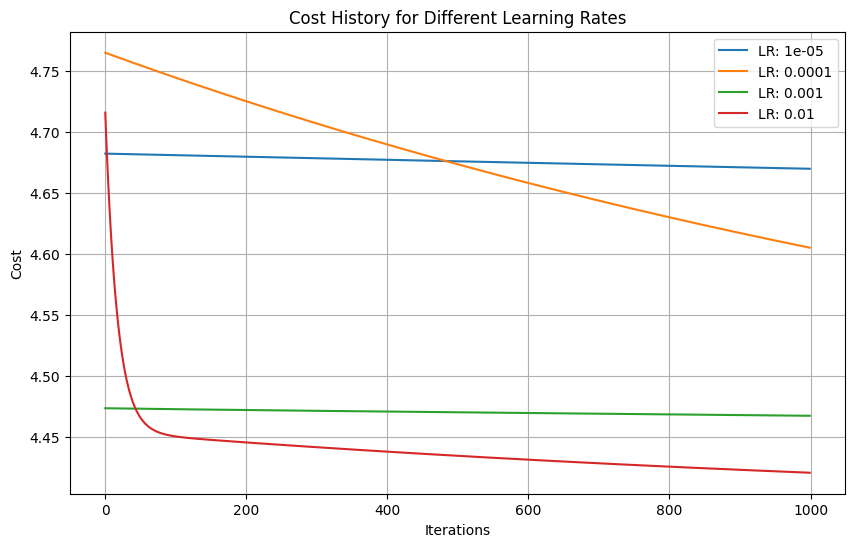

In [ ]:
# h = a1*x^3 + a2*x^5
X_gd = np.column_stack([x**3, x**5])

# Experiment with different learning rates
learning_rates = [0.00001, 0.0001, 0.001, 0.01] # Reduced learning rates
n_iterations = 1000
results = {}

for lr in learning_rates:
    theta_gd, cost_history = batch_gradient_descent(X_gd, y, lr, n_iterations)
    results[lr] = {'theta': theta_gd, 'cost_history': cost_history}
    print(f"Learning Rate: {lr}, Final Cost: {cost_history[-1]:.4f}")

plt.figure(figsize=(10, 6))
for lr, data in results.items():
    plt.plot(data['cost_history'], label=f'LR: {lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

Learning Rate: 1e-05, Final Cost: 2.7804
Learning Rate: 0.0001, Final Cost: 5.5796
Learning Rate: 0.001, Final Cost: 0.2453
Learning Rate: 0.01, Final Cost: 0.0096


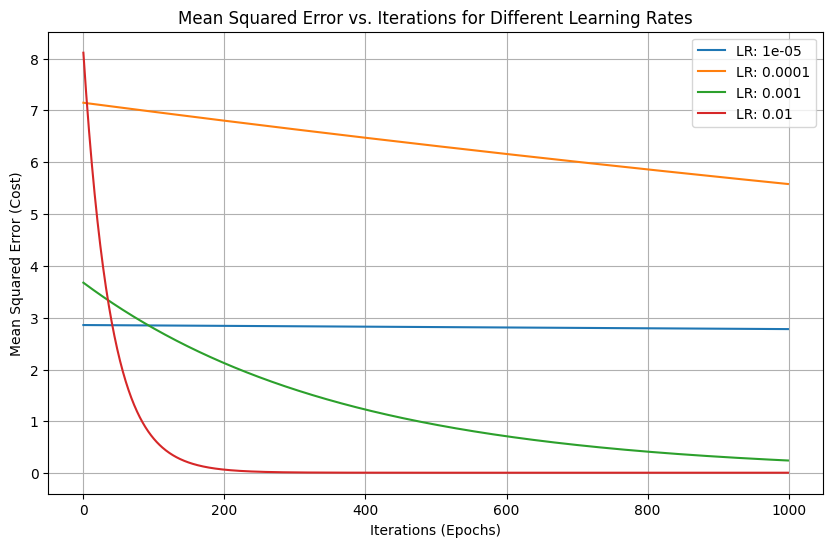

In [ ]:
# h = a1*x + a2*x^4
X_gd = np.column_stack([x, x**4])

# Experiment with different learning rates
learning_rates = [0.00001, 0.0001, 0.001, 0.01] # Reduced learning rates
n_iterations = 1000
results = {}

for lr in learning_rates:
    theta_gd, cost_history = batch_gradient_descent(X_gd, y, lr, n_iterations)
    results[lr] = {'theta': theta_gd, 'cost_history': cost_history}
    print(f"Learning Rate: {lr}, Final Cost: {cost_history[-1]:.4f}")

plt.figure(figsize=(10, 6))
for lr, data in results.items():
    plt.plot(data['cost_history'], label=f'LR: {lr}')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Mean Squared Error (Cost)')
plt.title('Mean Squared Error vs. Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()